# Sparsh Khanna

## Main Research Question
> **Who are the top 4 IPL Bowlers of all time?**
### Sub-Research Question 1
> **Who is the best death bowler?**
### Sub-Research Question 2
> **Who is the best wicket taking bowler?**

I plan to use the data in my dataset in a way that i assign a score or a value for a particular stat for each bowler. For example number of wickets have a certain score value , number of dots bowled is a value , the number of extras given and much more . Using these scoring metrics i will have a list of all the bowlers and their designated score from which i can make the final 4. I also plan to add more columns like period of the game(opening or death) which will help me in improving my analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

In [2]:
#IMPORTING THEMES
sns.set_theme(style="ticks",
              font_scale=1.3, 
             )
plt.rc("axes.spines", top=False, right=False)

#IMPORTING DATA
ball_by_ball = pd.read_csv("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
ball_by_ball['ballcounter']=1
matches = pd.read_csv("../data/raw/IPL_Matches_2008_2022 (1).csv")

#CLEANING AND PROCESSING MY DATA
bowling_data = ball_by_ball[['ID','bowler', 'total_run', 'isWicketDelivery', 'extras_run', 'ballcounter']]
bowler_stats = bowling_data.groupby('bowler').agg({'total_run': 'sum', 'isWicketDelivery': 'sum', 'extras_run': 'sum', 'ballcounter': 'sum'})
bowler_stats.rename(columns={'total_runs': 'runs_given', 'isWicketDelivery':'wickets_taken', 'extras_run': 'extras_given', 'ballcounter': 'balls_bowled'}, inplace=True)
bowler_stats['overs_bowled'] = bowler_stats['balls_bowled'] // 6
bowler_stats=bowler_stats[bowler_stats['overs_bowled']>=300]
bowler_stats.sort_values(by='wickets_taken', ascending=False, inplace=True)
bowler_stats['Economy Rate']=bowler_stats['total_run']/bowler_stats['overs_bowled']
bowler_stats.replace([np.inf, -np.inf], 0, inplace=True)

# Print the summary
bowler_stats.head(15)

,total_run,wickets_taken,extras_given,balls_bowled,overs_bowled,Economy Rate
bowler,,,,,,
DJ Bravo,4436,207,258,3296,549,8.080146
SL Malinga,3486,188,292,2974,495,7.042424
A Mishra,4022,175,125,3317,552,7.286232
R Ashwin,4596,174,209,4024,670,6.859701
YS Chahal,3699,172,175,2940,490,7.548980
SP Narine,3907,171,152,3516,586,6.667235
PP Chawla,4368,165,134,3309,551,7.927405
B Kumar,4064,165,246,3384,564,7.205674
Harbhajan Singh,4101,161,173,3496,582,7.046392


## **Exploratory Data Analysis**

### *Creating Visualizations*

### **I. Creating a Plot for Overs Bowled against Runs Given for Bowlers in IPL**

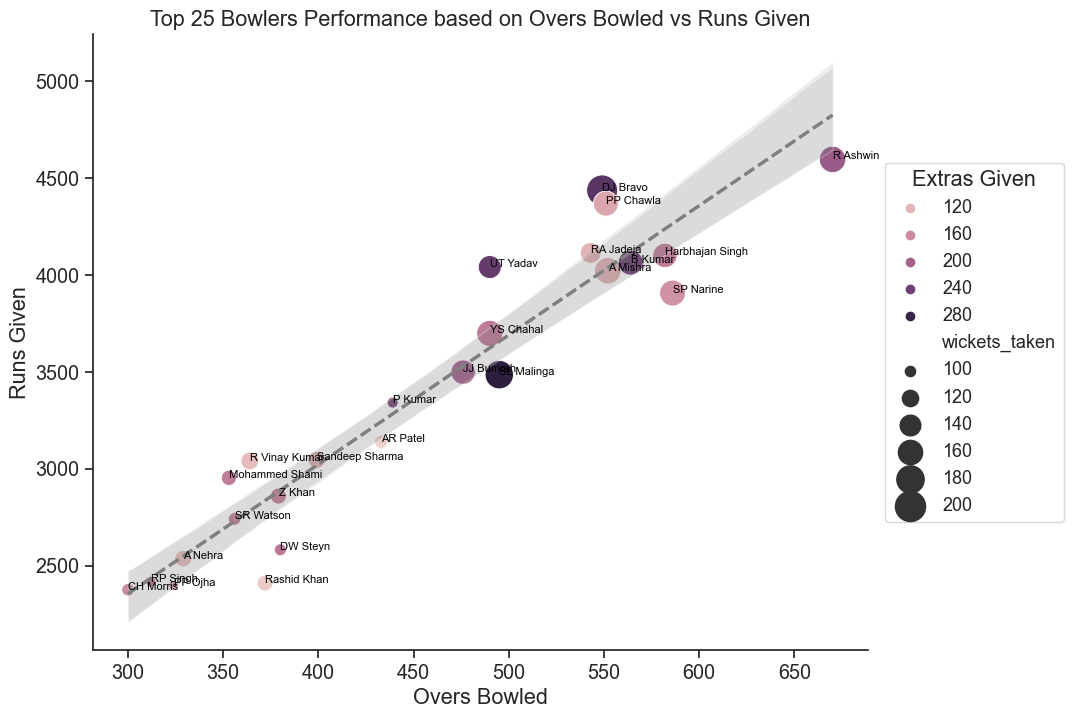

In [3]:
bs = bowler_stats.sort_values('wickets_taken', ascending=False).head(25).copy()

#Creating Plot
fig, ax = plt.subplots(figsize=(10, 8))
scatterplot = sns.scatterplot(x='overs_bowled', y='total_run', hue='extras_given', size='wickets_taken', sizes=(50, 500), data=bs.reset_index(), ax=ax)
for line in range(0,bs.shape[0]):
     scatterplot.text(bs.overs_bowled.iloc[line]+0.05, bs.total_run.iloc[line], bs.index[line], ha='left', fontsize=8, color='black')
        
avg_run = bs['total_run'].mean()
avg_ovr = bs['overs_bowled'].mean()

sns.regplot(x='overs_bowled', y='total_run', data=bs.reset_index(), scatter=False, ax=ax, color='gray', line_kws={'linestyle':'--'})
sns.regplot(x='overs_bowled', y='total_run', data=bs.reset_index(), scatter=False, ax=ax, color='gray', line_kws={'linestyle':'--'})

ax.set_xlabel('Overs Bowled')
ax.set_ylabel('Runs Given')
ax.set_title('Top 25 Bowlers Performance based on Overs Bowled vs Runs Given')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Extras Given', loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize='small')
plt.show()

#### *Analysis of Plot*
**The trend line denotes average Runs Given per Over Bowled and shaded region represents 95% CI. Bowlers below the line have good economy. Size of the circle is directly propotional to the wickets taken and the darker the circle the more extras given.**
 * Bumrah and P Kumar have similar economy as you there are within 95%CI of the trend line. However, Bumrah has far more wickets than P kumar. 
 * Narine's economy is exceptional this can be seen as he is far below the shaded region.
 * DJ Bravo has a below average economy but has taken a lot of wickets this could be an indication that he bowls primarily in death or in the powerplay (the first 6 overs).


### **II. Creating a Plot for Economy Rate vs Wickets Taken**

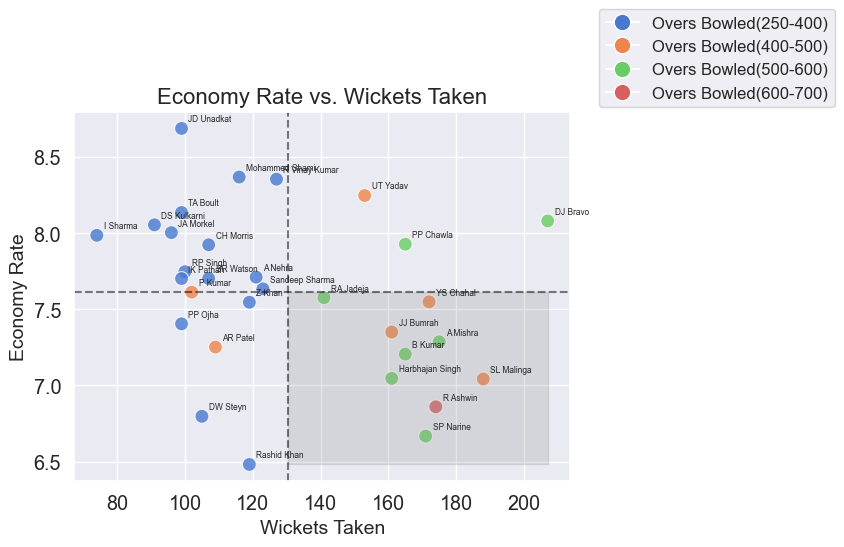

In [4]:
sns.set_style('darkgrid')
palette = sns.color_palette("muted", 4)
bs = bowler_stats.reset_index()
color_list = pd.cut(bs['overs_bowled'], bins=[299, 400, 500, 600, 700], labels=['blue', 'green', 'yellow', 'red'])
sns.scatterplot(data=bs, x='wickets_taken', y='Economy Rate', hue=color_list, palette=palette, s=100, alpha=0.8)
plt.xlabel('Wickets Taken', fontsize=14)
plt.ylabel('Economy Rate', fontsize=14)
plt.title('Economy Rate vs. Wickets Taken', fontsize=16)
for i, row in bs.iterrows():
    y, x = row['Economy Rate'], row['wickets_taken']
    label = row['bowler']
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='left', fontsize=6)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Overs Bowled(250-400)', markerfacecolor=palette[0], markersize=12),
                   plt.Line2D([0], [0], marker='o', color='w', label='Overs Bowled(400-500)', markerfacecolor=palette[1], markersize=12),
                   plt.Line2D([0], [0], marker='o', color='w', label='Overs Bowled(500-600)', markerfacecolor=palette[2], markersize=12),
                   plt.Line2D([0], [0], marker='o', color='w', label='Overs Bowled(600-700)', markerfacecolor=palette[3], markersize=12)]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12, bbox_to_anchor=(1.25, 1.0, 0.3, 0.3))
avg_wickets = bs['wickets_taken'].mean()
avg_er = bs['Economy Rate'].mean()
plt.axhline(y=avg_er, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=avg_wickets, color='black', linestyle='--', alpha=0.5)
plt.fill_between(x=[avg_wickets, bs['wickets_taken'].max()], y1=bs['Economy Rate'].min(), y2=avg_er, alpha=0.2, color='gray')
plt.show()

#### *Analysis of Plot*
**Bowlers with low economy and high wicket taking is represented in the bottom right quadrant. Colour denotes the overs they have bowled.**
 * Ashwin is the only bowler with over 600 overs in this category which showcases his consistency.
 * However, Malinga has more wickets than ashwin in less overs and there isn't much of a difference in their economy. Not only that but also he has most wickets than anyone who has bowled less than 500 overs. This could suggest that he is one of best bowlers in the IPL.
 * Rashid has the lowest economy but hasn't bowled more than 400 overs this could be the reason why he barely misses out on this category. He has't been in the IPL for long and could possibly be one for the future.


### **III. Creating a Plot of Wickets Taken in IPL History**

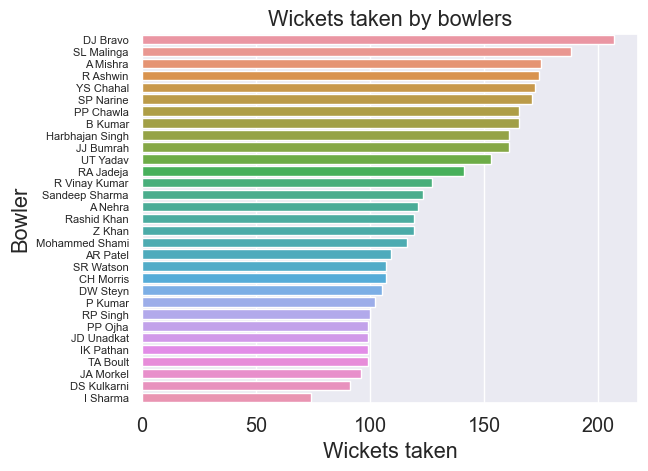

In [5]:
sns.barplot(data=bs, x="wickets_taken", y="bowler")
plt.title('Wickets taken by bowlers')
plt.xlabel('Wickets taken')
plt.ylabel('Bowler')
plt.yticks(range(0, len(bs), 1), bs['bowler'][::1],fontsize=8)
plt.show()

#### *Analysis of Plot*
**DJ Bravo has the most wickets. Malinga is second. They have been in IPL for a long time, thus, this makes sense.**


## **ANALYSIS PIPELINE** 

### *Load Data*

In [6]:
#IMPORTING THE DATA
from codes import project_functions2 as pf2

matches = pf2.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")
ball_by_ball = pf2.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")

### *Clean Data*

In [7]:
#DROPPING THE COLUMNS THAT DONT HELP IN OUR ANALYSIS
new_matches = matches.drop(columns = ['City','Date','Venue','TossWinner','TossDecision', 'SuperOver','WonBy', 'Margin', 'method','Umpire1', 'Umpire2'])

#DROPPING THE COLUMNS THAT DONT HELP IN OUR ANALYSIS
new_ball = ball_by_ball.drop(columns = ['non-striker','kind', 'fielders_involved'])   

### *Process and Wrangle Data*
 **Here with my data i am gonna filter out the qualifiers data set to drop unecessary columns and only keep the required columns and statistics.Later as i have described these qualifier stats and death (final) overs stats form 40% of my scoring criteria. I will create two new data sets  in which i will calculate the stats of all bowlers in death overs and qualifier games.After that i will use  the stats from all three of my data sets that are 1-All time stats 2- Qualifier Games Stats 3-Death Overs Stats.**  


#### Creating a Dataset with only Playoff Games

In [8]:
#DROPPING NON PLAYOFF GAMES USING THE ENTRIES IN MATCHNUMBER COLUMN WHICH SPECIFIES THE GAME BEING PLAYED(I.E LEAGUE OR PLAYOFF)
new_matches = new_matches[(new_matches['MatchNumber'] == 'Final') | (new_matches['MatchNumber'] == 'Eliminator') | (new_matches['MatchNumber'] == 'Qualifier 1') | (new_matches['MatchNumber'] == 'Qualifier 2')]

#USING MY PYTHON FUNCTION TO CALCULATE THE STATS OF MY BOWLERS
bo2 = pf2.calculate_playoff_stats(new_ball,new_matches)

#FINDING THE OVERS BOWLED BY EACH BOWLER
bo2["Overs"]=bo2["Balls Bowled"]//6

#FINDING THE ECONOMY OF EACH BOWLER WHICH IS NOTHING BUT RUNS GIVEN PER OVER
bo2["Economy Rate"]= bo2["Total Runs"]/bo2["Overs"]
bo2

,Bowler,Matches,Total Runs,Balls Bowled,Wickets,Overs,Economy Rate
0,A Kumble,1,18,24,4,4,4.500000
1,A Mishra,2,32,48,2,8,4.000000
2,A Mithun,3,80,44,1,7,11.428571
3,A Nehra,5,183,126,9,21,8.714286
4,A Nortje,5,174,113,6,18,9.666667
...,...,...,...,...,...,...,...
152,Washington Sundar,3,50,61,3,10,5.000000
153,YK Pathan,3,46,36,3,6,7.666667
154,YS Chahal,9,264,220,10,36,7.333333
155,Yash Dayal,2,64,45,4,7,9.142857


#### Creating a Dataset with the Stats of Bowlers in Death Overs (Overs 15 - 20)

In [9]:
#FINDING THE BOWLERS WHO HAVE BOWLED IN THE DEATH OVERS (OVERS 15-20 ARE CONSIDERED DEATH OVERS)
#df2 = new_ball[new_ball['overs'] >14]

#USING MY PYTHON FUNCTION TO CALCULATE THE STATS 
bo1 = pf2.calculate_death_stats(new_ball)
#FINDING THE OVERS BOWLED BY EACH BOWLER
bo1["Overs"]=bo1["Balls Bowled"]//6
#FINDING THE ECONOMY OF EACH BOWLER WHICH IS NOTHING BUT RUNS GIVEN PER OVER
bo1["Economy Rate"]= bo1["Total Runs"]/bo1["Overs"]
bo1

,Bowler,Matches,Total Runs,Balls Bowled,Wickets,Overs,Economy Rate
0,A Ashish Reddy,13,169,105,11,17,9.941176
1,A Chandila,1,6,6,0,1,6.000000
2,A Choudhary,3,40,27,1,4,10.000000
3,A Flintoff,2,59,24,1,4,14.750000
4,A Kumble,28,217,174,18,29,7.482759
...,...,...,...,...,...,...,...
395,YK Pathan,14,127,81,4,13,9.769231
396,YS Chahal,72,685,466,45,77,8.896104
397,Yash Dayal,8,80,61,5,10,8.000000
398,Yuvraj Singh,17,158,114,6,19,8.315789


## **FINAL DATA ANALYSIS**

### **Sub-Research Question 1:**
**Who is the best death bowler?**
> Death bowling is all about economy and consistency. Taking wickets while having high economy is worse than not taking wicket6s but having a low economy. Hence, let's analyse this by first concluding if taking wickets affects economy.

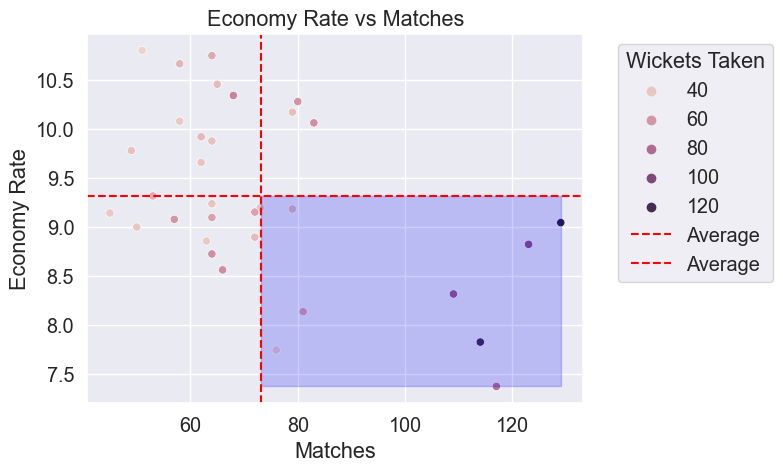

In [10]:
#Filtering the data
bo1_filtered = bo1[bo1['Wickets'] >= 35]
# Scatterplot of Economy Rate vs Matches
sns.scatterplot(data=bo1_filtered, x='Matches', y='Economy Rate', hue ='Wickets')
plt.title('Economy Rate vs Matches')
plt.xlabel('Matches')
plt.ylabel('Economy Rate')

# Add average line
econ_rate_mean = bo1_filtered['Economy Rate'].mean()
matches_mean = bo1_filtered['Matches'].mean()
plt.axhline(econ_rate_mean, color='red', linestyle='--', label='Average')
plt.axvline(matches_mean, color='red', linestyle='--', label='Average')

# Add legend and shift it outside of the plot
plt.legend(title='Wickets Taken',loc='upper left', bbox_to_anchor=(1.05, 1))

# Shade the bottom right quadrant
plt.fill_between(x=[matches_mean, bo1_filtered['Matches'].max()], y1=bo1_filtered['Economy Rate'].min(), y2=econ_rate_mean, alpha=0.2, color='blue')

# Display plot
plt.show()


#### The above plot is Economy rate vs Matches in death overs. Its is filtered for bowlers who have taken 35+ wickets.
* We can see that generally bowlers who have bowled in more than average matches has low economy, this suggets that economy is crucial in deciding the performance of bowler in death overs.
* You can see that there is no impact on economy for example a bowler with around 80 matches has a very low economy while very less wickets another bowler who has played around the same matches has high economy while taking more wickets. Counter examples to this can also be seen on the graph.
* Thus, concluding that taking wickets has no effect on the economy rate of the bowler.



**Now let's take the bottom right quadrant and see who has the best economy in Death Overs**

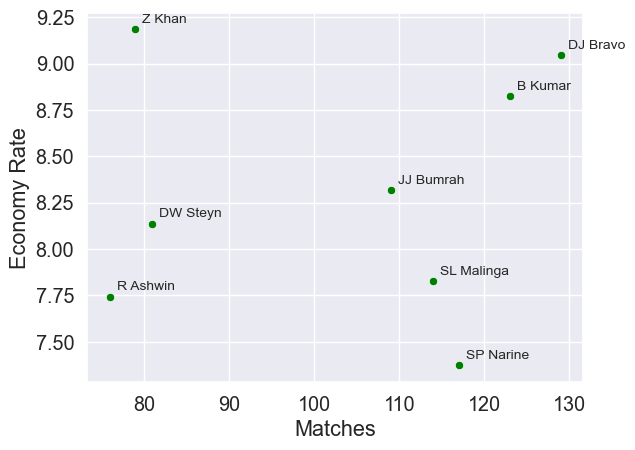

In [11]:
bo1_filtered = bo1_filtered[bo1_filtered['Matches'] >= matches_mean]
bo1_filtered = bo1_filtered[bo1_filtered['Economy Rate'] <= econ_rate_mean]

# Display the filtered points
sns.scatterplot(data=bo1_filtered, x='Matches', y='Economy Rate', color='green')
# Add labels to data points
for i, row in bo1_filtered.iterrows():
    y, x = row['Economy Rate'], row['Matches']
    label = row['Bowler']
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='left', fontsize=10)

# Display plot
plt.show()



## **Final Result**

**Sunil Narine** not only has the best economy in Death Overs but also has one of the highest matches played. Indeed, he is the best Death Bowler.

### **Sub-Research Question 2:**
**Who is the best wicket taking bowler?**

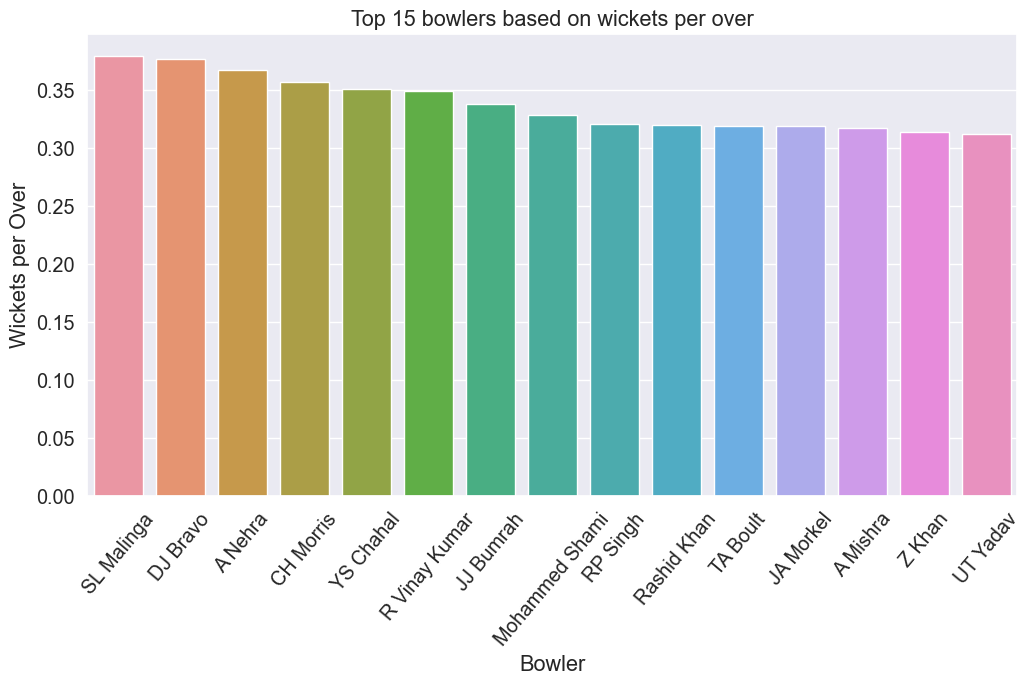

In [12]:
bowler_stats['Wickets per over'] = bowler_stats['wickets_taken'] / bowler_stats['overs_bowled']
wicket_bowlers = bowler_stats.sort_values(by='Wickets per over', ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(data=wicket_bowlers, x=wicket_bowlers.index, y='Wickets per over')
plt.xticks(rotation=50)
plt.xlabel('Bowler')
plt.ylabel('Wickets per Over')
plt.title('Top 15 bowlers based on wickets per over')
plt.show()

## **Final Result**

**SL Malinga** has highest wickets taken per over which means he is the best Wicket-Taking Bowler.

## **MAIN RESEARCH QUESTION:**
**WHO ARE THE TOP 4 BOWLERS IN IPL?**

   #### **Steps Taken:**
  ##### 1- Load my  Processed and Wrangled data. 
 #####  2-Calculating the weighted score for each bowler where i am gonna give 20% of the score based on death bowling statistics , because in t20 death overs are     cruical .Another 20 based on playoffs because i beleive  making it to playoffs is a big achievement and it means the bowlers have been doing their job well to   ensure their team made it here.And the remaining 60 based on their all time statistics.
 #####  3- Adding my calculated weighted score for each player to a new column and sorting my datatset based on this weighted score.
 #####  4- Taking the top 25 bowlers from my list out of which eventhough only the top 4 will matter, including more bowlers will show what really made these 4 bowlers different from the other bowlers who have had impressive carrers and performances but failed to beat the top 4 in certain areas that were detrimental.

In [13]:
#USING MY PYTHON FUNCTIONS TO CALCULATE THE WEIGHTED SCORE FOR EACH BOWLER
bo1 = bo1.set_index('Bowler')
bo2 = bo2.set_index('Bowler')
bowler_stats["Weighted Score"]= pf2.calculate_bowling_index(bowler_stats) + pf2.calculate_bowling_index1(bo1)+pf2.calculate_bowling_index1(bo2)
#SORTING THE FINAL RESULTS IN A DESCENDING ORDER OF THE WEIGHTED SCORE SO THAT WE CAN FIND OUT WHO ARE OUR TOP 4
df_sorted = bowler_stats.sort_values('Weighted Score', ascending=False)
#TAKING THE TOP 25
df_sorted = df_sorted.head(10)
#DISPLAYING THE FINAL RESULT
df_sorted

,total_run,wickets_taken,extras_given,balls_bowled,overs_bowled,Economy Rate,Wickets per over,Weighted Score
bowler,,,,,,,,
SL Malinga,3486,188,292,2974,495,7.042424,0.379798,122.577118
DJ Bravo,4436,207,258,3296,549,8.080146,0.377049,119.473930
JJ Bumrah,3499,161,201,2857,476,7.350840,0.338235,119.115917
SP Narine,3907,171,152,3516,586,6.667235,0.291809,117.113501
YS Chahal,3699,172,175,2940,490,7.548980,0.351020,115.068578
B Kumar,4064,165,246,3384,564,7.205674,0.292553,114.894541
A Mishra,4022,175,125,3317,552,7.286232,0.317029,114.635199
A Nehra,2537,121,115,1974,329,7.711246,0.367781,114.374886
R Ashwin,4596,174,209,4024,670,6.859701,0.259701,113.463369


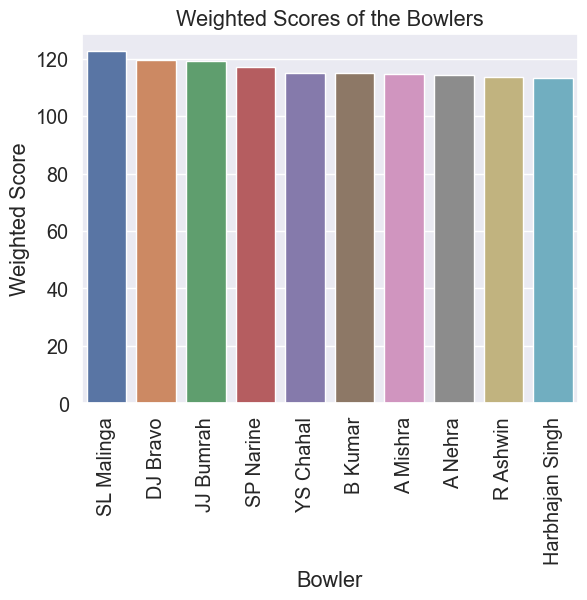

In [14]:
# Creating a Graph for Weighted Scores
ax = sns.barplot(data=df_sorted,x=df_sorted.index,y="Weighted Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Bowler')
plt.ylabel('Weighted Score')
plt.title('Weighted Scores of the Bowlers')
plt.show()

## **FINAL RESULT** 
#### **RESEARCH QUESTION** :Who are the top 4 bowlers in the history of IPL ?
**ANSWER:**
- **L.MALINGA**
- **DJ BRAVO**
- **J BUMRAH**
- **S NARINE**

In [15]:
#SAVING THE FINAL RESULT TO MY DIRECTORY
df_sorted.to_csv("../data/processed/bowlerstatsfinalsparsh.csv")